In [16]:
# Stock_LSTM()
import LSTM_Model

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

This chunk of code is a trimmed version of LSTM model from the commented notebook. This servers as a callable function to analylze APH and SPDM

In [43]:
#
# Unable to pass function from LSTM_Model.py | If in grading feedback you can leave a solution that would be great! 
# When I call the function, I get an error, "pdr is not defined" though pdr is properly imported.
#
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
yf.pdr_override()
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data as pdr


def Stock_LSTM(stock, numEpochs):
    df = pdr.get_data_yahoo(stock, start='2009-04-01', end='2024-05-02')
    data = df.filter(['Close'])
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * .80))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    train_data = scaled_data[0:int(training_data_len), :]
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])
        if i <= 61:
            print(x_train)
            print(y_train)
            print()
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1], 1)))
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=numEpochs)
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])
    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(rmse)
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    plt.figure(figsize=(16, 6))
    plt.title(f'{stock} pricing model predictions')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    for i in valid['Close']:
        valid['Diff'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100
    return valid.describe()


[*********************100%%**********************]  1 of 1 completed

[array([1.41384181e-03, 6.72119074e-03, 5.39435247e-03, 5.24209316e-03,
       2.61014780e-04, 8.70035437e-05, 3.34971733e-03, 2.34915376e-03,
       2.45790923e-03, 0.00000000e+00, 5.89463426e-03, 3.74124365e-03,
       3.17570610e-03, 5.78587879e-03, 7.33023214e-03, 7.35197992e-03,
       9.89690099e-03, 8.87458134e-03, 9.15735220e-03, 1.12889909e-02,
       1.10062200e-02, 1.16152573e-02, 1.38556597e-02, 1.19415320e-02,
       1.11367316e-02, 7.63475077e-03, 7.98277324e-03, 4.98107423e-03,
       5.48135602e-03, 4.06751420e-03, 6.02514165e-03, 6.56892728e-03,
       8.93983297e-03, 1.01361597e-02, 1.03536789e-02, 7.02570522e-03,
       7.19972060e-03, 1.02231674e-02, 9.04858843e-03, 9.50537467e-03,
       1.00274042e-02, 1.36816443e-02, 1.35728889e-02, 9.96215261e-03,
       1.07669530e-02, 1.00709081e-02, 7.63475077e-03, 8.98333681e-03,
       1.11149755e-02, 1.23548061e-02, 1.12672348e-02, 9.17909997e-03,
       7.11271291e-03, 7.26497222e-03, 7.52599530e-03, 6.24265673e-03,
     


C:\Users\Greg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2978/2978 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - loss: 5.5662e-04
Epoch 2/3
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 1.6368e-04
Epoch 3/3
2978/2978 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - loss: 9.4855e-05
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
2.017981181223643


C:\Users\Greg\AppData\Local\Temp\ipykernel_200764\1679365043.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


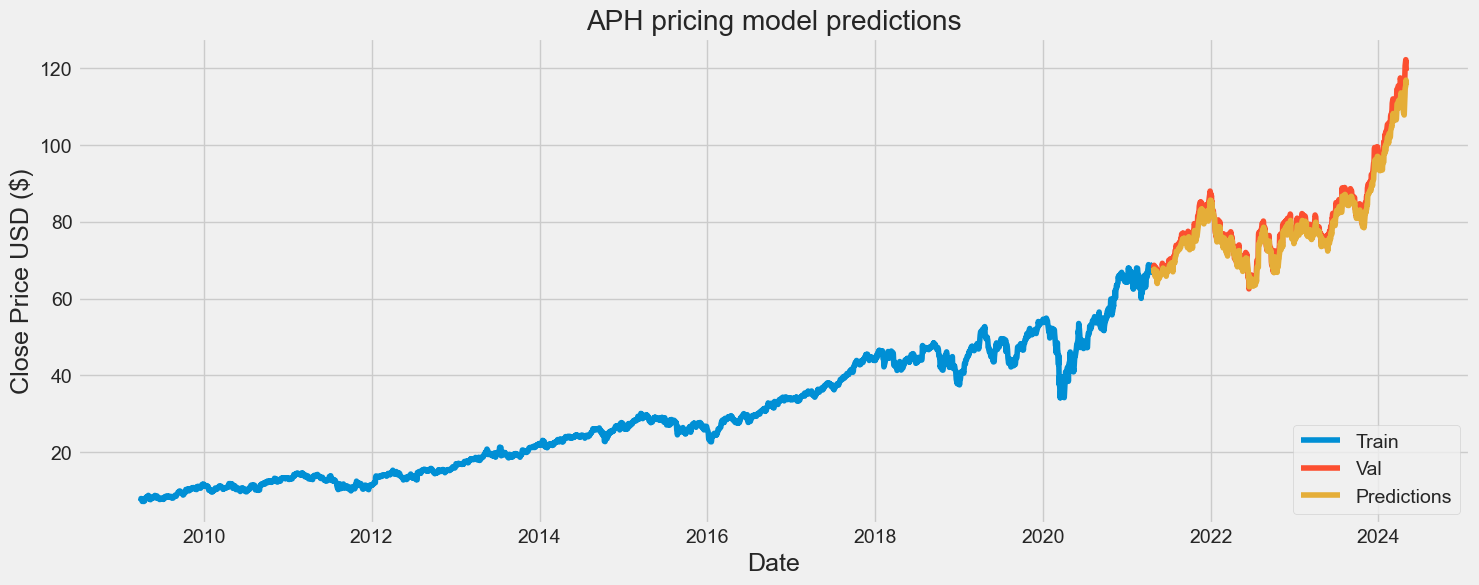

C:\Users\Greg\AppData\Local\Temp\ipykernel_200764\1679365043.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100


,Close,Predictions,Diff
count,759.000000,759.000000,759.000000
mean,80.697721,79.231598,-1.719069
std,11.844357,11.061853,1.564864
min,62.509998,63.035645,-8.482599
25%,73.700001,72.669178,-2.701892
50%,77.889999,76.805298,-1.843381
75%,84.334999,82.741547,-0.788343
max,122.129997,116.812584,5.706674


In [44]:
# Gives us the LSTM Predictions of SPMD and APH
Stock_LSTM('APH',3)

[*********************100%%**********************]  1 of 1 completed

[array([0.14850347, 0.14933776, 0.16018357, 0.16445926, 0.16831784,
       0.16393784, 0.16571067, 0.17301076, 0.17280215, 0.17718221,
       0.17634786, 0.16946499, 0.17832936, 0.17540932, 0.17092501,
       0.17499215, 0.18062361, 0.19053082, 0.19115655, 0.19146942,
       0.18458649, 0.17812074, 0.17812074, 0.18396076, 0.1846908 ,
       0.18427363, 0.18041505, 0.1641464 , 0.16393784, 0.15434349,
       0.16591928, 0.16174784, 0.17040359, 0.17415786, 0.17520076,
       0.15778495, 0.1597664 , 0.16498069, 0.15590782, 0.15549065,
       0.16717068, 0.17029928, 0.1726979 , 0.18124934, 0.18834082,
       0.19146942, 0.18896655, 0.18969653, 0.19303369, 0.20075084,
       0.21024088, 0.20898948, 0.20294084, 0.19939513, 0.20200224,
       0.20273228, 0.20492228, 0.20429661, 0.20106371, 0.2117009 ])]
[0.21076230374140292]

[array([0.14850347, 0.14933776, 0.16018357, 0.16445926, 0.16831784,
       0.16393784, 0.16571067, 0.17301076, 0.17280215, 0.17718221,
       0.17634786, 0.16946499, 0.17


C:\Users\Greg\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2119/2119 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0051
Epoch 2/3
2119/2119 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - loss: 7.1939e-04
Epoch 3/3
2119/2119 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 5.4410e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
0.723691964894239


C:\Users\Greg\AppData\Local\Temp\ipykernel_200764\1679365043.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


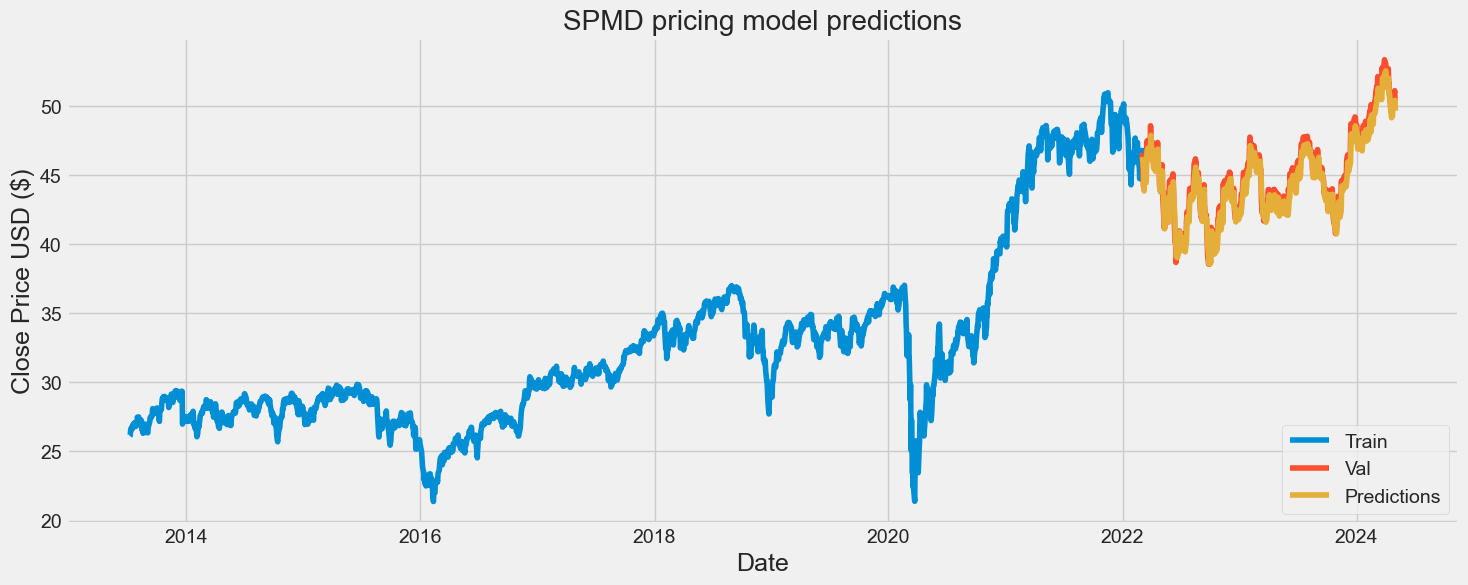

C:\Users\Greg\AppData\Local\Temp\ipykernel_200764\1679365043.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff'] = ((valid['Predictions'] - valid['Close']) / valid['Close']) * 100


,Close,Predictions,Diff
count,544.000000,544.000000,544.000000
mean,44.943750,44.542732,-0.863150
std,3.092444,2.929879,1.352129
min,38.549999,38.554909,-5.836374
25%,42.737501,42.433283,-1.789372
50%,44.570000,44.120468,-0.913842
75%,46.840000,46.329083,-0.043496
max,53.340000,52.530041,4.498038


In [45]:
Stock_LSTM('SPMD',3)